<a href="https://colab.research.google.com/github/JiPang22/MLP/blob/master/%EC%A7%80%ED%8F%89mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#마운트
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import pickle
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#데이터
ntrain = 10000
ntest = 1000
ncase = 5

dt = 0.01 ; itmax = 10000 ; isample = 5
dmax = 500 ; nmax = 200 ; g0=7
ncase = 5 ; ntrain = 10000 ; ntest = 1000

#데이터 불러오기
f = open('/content/drive/MyDrive/data.pkl', 'rb')

my_list = pickle.load(f,encoding='latin1')

train_data0 = my_list['train_data'] 
train_label = my_list['train_label']
test_data0 = my_list['test_data']
test_label = my_list['test_label']

train_data1=np.reshape(train_data0,(ntrain,dmax))
test_data1=np.reshape(test_data0,(ntest,dmax))

In [30]:
#샘플링
nsample_list=[]
acc_list=[]
loss_list=[]
for i in [1,2,5,10,20,50]:
    nstep=i
    nsample=int(500/nstep)
    nsample_list.append(nsample)

    train_data2=train_data0[:,::nstep]
    test_data2=test_data0[:,::nstep]

    print("\n","nsample:",nsample,'\n',"train_data2.shape:",train_data2.shape,'\n',"test_data2.shape:",test_data2.shape)

    #모델 컴파일
    MODEL_SAVE_FOLDER_PATH = '/content/drive/MyDrive/model_save/'

    if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
        os.mkdir(MODEL_SAVE_FOLDER_PATH)

    model_path = MODEL_SAVE_FOLDER_PATH + f'MLP_{nsample}.hdf5'.format(b=ntrain)

    cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_accuracy', \
                                    verbose=1, save_best_only=True)
    cb_early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

    model = Sequential()

    #입력층
    model.add(Input(shape= nsample))
    
    #은닉층
    model.add(Dense(1000, activation=None))
    model.add(BatchNormalization())
    model.add(Activation('ReLU'))
    model.add(Dropout(0.0))

    model.add(Dense(1000, activation=None))
    model.add(BatchNormalization())
    model.add(Activation('ReLU'))
    model.add(Dropout(0.5))

    #출력층
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()

    
    hist=model.fit(train_data2, train_label, validation_split=0.3, \
                   epochs=20, batch_size=100, verbose=1)
                   #callbacks=[cb_checkpoint, cb_early_stopping])

    #hist저장 
    json.dump(hist.history, open(f'/content/drive/MyDrive/hist_save/hist{nsample}', 'w'))

    loss, acc = model.evaluate(test_data2,  test_label, verbose=2)
    loss_list.append(loss)
    acc_list.append(acc)

    print('loss:',loss,'acc:',acc)



 nsample: 500 
 train_data2.shape: (10000, 500) 
 test_data2.shape: (1000, 500)
Epoch 1/20
70/70 [==============================] - 1s 7ms/step - loss: 1.2267 - accuracy: 0.4944 - val_loss: 9.9550 - val_accuracy: 0.0000e+00
Epoch 2/20
70/70 [==============================] - 0s 5ms/step - loss: 0.9389 - accuracy: 0.5729 - val_loss: 7.0063 - val_accuracy: 0.0033
Epoch 3/20
70/70 [==============================] - 0s 5ms/step - loss: 0.8585 - accuracy: 0.6033 - val_loss: 7.1817 - val_accuracy: 0.0270
Epoch 4/20
70/70 [==============================] - 0s 5ms/step - loss: 0.8469 - accuracy: 0.6181 - val_loss: 7.9984 - val_accuracy: 0.1247
Epoch 5/20
70/70 [==============================] - 0s 6ms/step - loss: 0.7900 - accuracy: 0.6376 - val_loss: 8.4838 - val_accuracy: 0.1537
Epoch 6/20
70/70 [==============================] - 0s 5ms/step - loss: 0.7608 - accuracy: 0.6519 - val_loss: 9.9056 - val_accuracy: 0.2303
Epoch 7/20
70/70 [==============================] - 0s 5ms/step - loss: 0.7

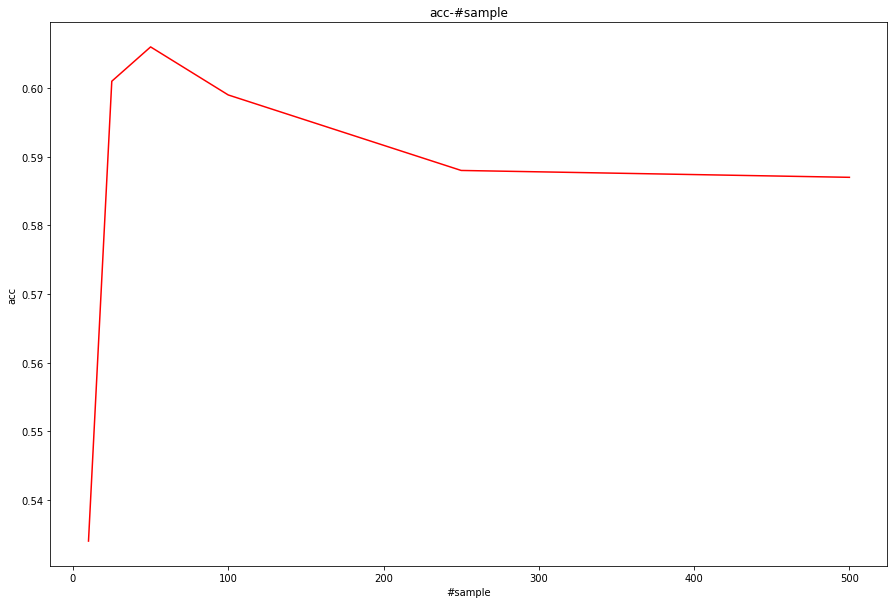

In [31]:
#데이터확인
plt.figure(figsize=(15,10))
plt.plot(nsample_list,acc_list, 'r-')
plt.title('acc-#sample')
plt.xlabel('#sample')
plt.ylabel('acc')
plt.show()


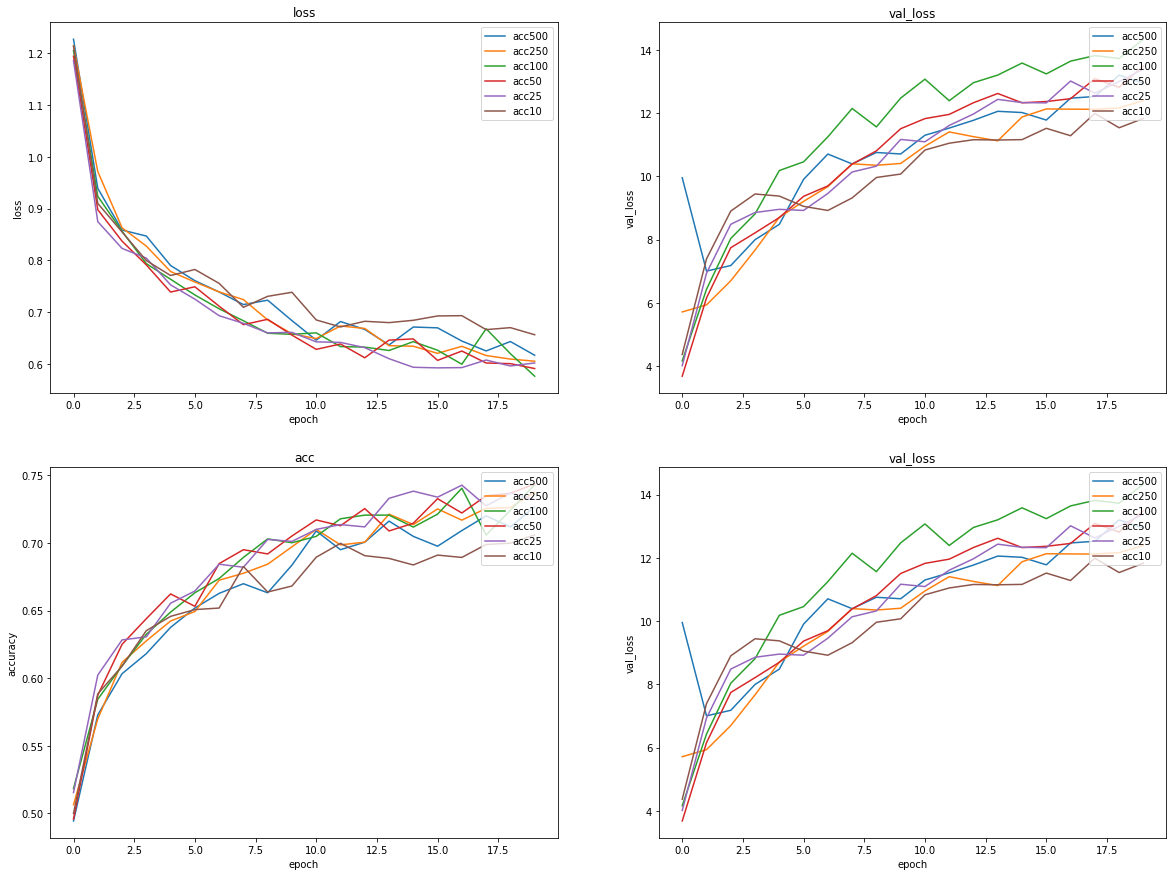

In [32]:
#################에포크에 따른 로스, 정확도 plot#######################
import matplotlib.pyplot as plt

hist500 = json.load(open('/content/drive/MyDrive/hist_save/hist500'))
hist250 = json.load(open('/content/drive/MyDrive/hist_save/hist250'))
hist100 = json.load(open('/content/drive/MyDrive/hist_save/hist100'))
hist50 = json.load(open('/content/drive/MyDrive/hist_save/hist50'))
hist25 = json.load(open('/content/drive/MyDrive/hist_save/hist25'))
hist10 = json.load(open('/content/drive/MyDrive/hist_save/hist10'))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15) )
fig.subplots_adjust(hspace=0.2, wspace=0.2)

#loss
axes[0,0].set_title('loss')
axes[0,0].plot(hist500['loss'], label='acc500' )
axes[0,0].plot(hist250['loss'], label='acc250' )
axes[0,0].plot(hist100['loss'], label='acc100' )
axes[0,0].plot(hist50['loss'], label='acc50' )
axes[0,0].plot(hist25['loss'], label='acc25' )
axes[0,0].plot(hist10['loss'], label='acc10' )
axes[0,0].set_ylabel('loss')
axes[0,0].set_xlabel('epoch')
axes[0,0].legend(loc='upper right')

#acc
axes[1,0].set_title('acc')
axes[1,0].plot(hist500['accuracy'], label='acc500' )
axes[1,0].plot(hist250['accuracy'], label='acc250' )
axes[1,0].plot(hist100['accuracy'], label='acc100' )
axes[1,0].plot(hist50['accuracy'], label='acc50' )
axes[1,0].plot(hist25['accuracy'], label='acc25' )
axes[1,0].plot(hist10['accuracy'], label='acc10' )
axes[1,0].set_ylabel('accuracy')
axes[1,0].set_xlabel('epoch')
axes[1,0].legend(loc='upper right')

#val_loss
axes[0,1].set_title('val_loss')
axes[0,1].plot(hist500['val_loss'], label='acc500' )
axes[0,1].plot(hist250['val_loss'], label='acc250' )
axes[0,1].plot(hist100['val_loss'], label='acc100' )
axes[0,1].plot(hist50['val_loss'], label='acc50' )
axes[0,1].plot(hist25['val_loss'], label='acc25' )
axes[0,1].plot(hist10['val_loss'], label='acc10' )
axes[0,1].set_ylabel('val_loss')
axes[0,1].set_xlabel('epoch')
axes[0,1].legend(loc='upper right')

#val_acc
axes[1,1].set_title('val_loss')
axes[1,1].plot(hist500['val_loss'], label='acc500' )
axes[1,1].plot(hist250['val_loss'], label='acc250' )
axes[1,1].plot(hist100['val_loss'], label='acc100' )
axes[1,1].plot(hist50['val_loss'], label='acc50' )
axes[1,1].plot(hist25['val_loss'], label='acc25' )
axes[1,1].plot(hist10['val_loss'], label='acc10' )
axes[1,1].set_ylabel('val_loss')
axes[1,1].set_xlabel('epoch')
axes[1,1].legend(loc='upper right')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/model_2022_v0/MLP.hdf5')

test_accuracy=0
for col in range(1000):
    aa=model.predict(test_data1[col:col+1,:])
    bb=test_label[col:col+1]
    aa_max=np.argmax(aa,axis=1)
    bb_max=np.argmax(bb,axis=1)

    if aa_max[0]==bb_max[0]:
        test_accuracy=test_accuracy+1
    elif aa_max[0]!=bb_max[0]:
        test_accuracy=test_accuracy+0

print(test_accuracy/1000)

print('\n Total Accuracy: {:.4f}'.format(model.evaluate(test_data1, test_label)[1]))
print('\n Class 1 Accuracy: {:.4f}'.format(model.evaluate(test_data1[0:200,:], test_label[0:200,:])[1]))
print('\n Class 2 Accuracy: {:.4f}'.format(model.evaluate(test_data1[200:400,:], test_label[200:400,:])[1]))
print('\n Class 3 Accuracy: {:.4f}'.format(model.evaluate(test_data1[400:600,:], test_label[400:600,:])[1]))
print('\n Class 4 Accuracy: {:.4f}'.format(model.evaluate(test_data1[600:800,:], test_label[600:800,:])[1]))
print('\n Class 5 Accuracy: {:.4f}'.format(model.evaluate(test_data1[800:1000,:], test_label[800:1000,:])[1]))

ValueError: ignored